# CR6 Results Analysis

## Python Imports

In [1]:
import numpy as np
import pandas as pd
from prettypandas import PrettyPandas
import patsy
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from IPython.display import display, Markdown, HTML

%matplotlib inline
PlotWidth = 6

import warnings
#warnings.filterwarnings('ignore')

### Install R Packages

In [12]:
# Using R inside python
import rpy2
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages

# Allow conversion
import rpy2.robjects as ro

from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

# Install packages
packnames = ('rsm')
#utils.install_packages(StrVector(packnames))

# Load packages
rsm = importr('rsm')
base = importr('base')

## Process CSV Files

In [3]:

# importing the pandas library
import pandas as pd
  
# reading the csv file using read_csv
# storing the data frame in variable called df
dfcost = pd.read_csv('https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_cost.txt', sep='\t')
dftime = pd.read_csv('https://raw.githubusercontent.com/wilsongis/3DP_Experiments/main/Data/cr6_time.txt', sep='\t')
  
# creating a list of column names by
# calling the .columns
list_of_columns_cost = list(dfcost.columns)
list_of_columns_time = list(dftime.columns)
  
# displaying the list of column names
print('List of Cost column names : ', 
      list_of_columns_cost)
print('List of Time column names : ', 
      list_of_columns_time)

List of Cost column names :  ['lh', 'ps', 'id', 'rw', 'wt', 'alh', 'aps', 'aid', 'arw', 'awt', 'cost1', 'cost2', 'cost3', 'cost4', 'cost5']
List of Time column names :  ['lh', 'ps', 'id', 'rw', 'wt', 'alh', 'aps', 'aid', 'arw', 'awt', 'time1', 'time2', 'time3', 'time4', 'time5']


In [4]:

# Names of ‘variable’ and ‘value’ columns can be customized
df_cost = pd.melt(dfcost, id_vars =['lh', 'ps', 'id', 'wt', 'rw', 'alh', 'aps', 'aid', 'awt', 'arw'],
              var_name ='rep', value_name ='cost')

In [5]:

display((Markdown("## 2<sup>(5-1)</sup> Factorial Design")))
df_cost

## 2<sup>(5-1)</sup> Factorial Design

,lh,ps,id,wt,rw,alh,aps,aid,awt,arw,rep,cost
0,-1,-1,-1,1,-1,0.16,50,0.25,0.8,0.4,cost1,0.51
1,1,-1,-1,-1,-1,0.28,50,0.25,1.2,0.4,cost1,0.51
2,-1,1,-1,-1,-1,0.16,60,0.25,1.2,0.4,cost1,0.54
3,1,1,-1,1,-1,0.28,60,0.25,0.8,0.4,cost1,0.51
4,-1,-1,1,-1,-1,0.16,50,0.15,1.2,0.4,cost1,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,-1,-1,1,0.28,60,0.25,1.2,0.8,cost5,0.54
76,-1,-1,1,1,1,0.16,50,0.15,0.8,0.8,cost5,0.54
77,1,-1,1,-1,1,0.28,50,0.15,1.2,0.8,cost5,0.54
78,-1,1,1,-1,1,0.16,60,0.15,1.2,0.8,cost5,0.54


In [6]:
display((Markdown("### Statistics for Cost")))
df_cost.cost.describe()

### Statistics for Cost

count    80.000000
mean      0.531500
std       0.019623
min       0.480000
25%       0.510000
50%       0.540000
75%       0.540000
max       0.560000
Name: cost, dtype: float64

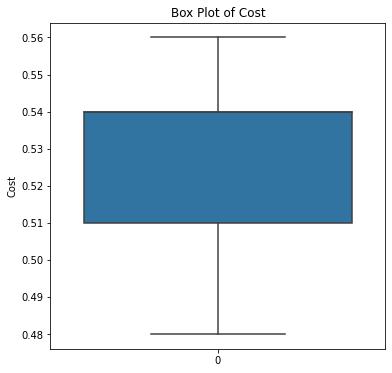

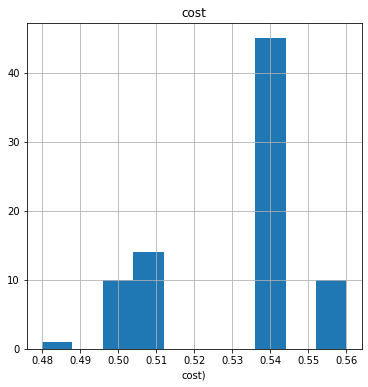

In [7]:
plt.figure(figsize=(PlotWidth, PlotWidth))
sns.boxplot(data=df_cost['cost'])
plt.title('Box Plot of Cost')
plt.ylabel('Cost')
plt.show()

plt.figure(figsize=(PlotWidth, PlotWidth))
df_cost['cost'].hist()
plt.title('cost')
plt.xlabel('cost)')
plt.show()


In [8]:
Factors = ['lh', 'ps', 'id', 'rw', 'wt']
Interactions = [[p,q] for p in Factors for q in Factors]
InteractionsToUse = Interactions[1:5] + Interactions [7:10] + Interactions [13:15] + Interactions [23:24]
display(InteractionsToUse)

[['lh', 'ps'],
 ['lh', 'id'],
 ['lh', 'rw'],
 ['lh', 'wt'],
 ['ps', 'id'],
 ['ps', 'rw'],
 ['ps', 'wt'],
 ['id', 'rw'],
 ['id', 'wt'],
 ['wt', 'rw']]

In [9]:
# newDoE = cr6DoE.copy(deep=True)
InteractionTerms = []
for i in np.arange(len(InteractionsToUse)):
    InteractionTerms += [InteractionsToUse[i][0] + ' * ' + InteractionsToUse[i][1]]
    df_cost[InteractionsToUse[i][0] + ' * ' + InteractionsToUse[i][1]] = (df_cost[InteractionsToUse[i][0]]-df_cost[InteractionsToUse[i][0]].mean()) * (df_cost[InteractionsToUse[i][1]]-df_cost[InteractionsToUse[i][1]].mean())
    
display(df_cost[Factors + InteractionTerms])

,lh,ps,id,rw,wt,lh * ps,lh * id,lh * rw,lh * wt,ps * id,ps * rw,ps * wt,id * rw,id * wt,wt * rw
0,-1,-1,-1,-1,1,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0
1,1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-1,1,-1,-1,-1,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
3,1,1,-1,-1,1,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
4,-1,-1,1,-1,-1,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,1,-1,1,-1,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
76,-1,-1,1,1,1,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
77,1,-1,1,1,-1,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0
78,-1,1,1,1,-1,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     176.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           5.35e-46
Time:                        14:57:02   Log-Likelihood:                 351.22
No. Observations:                  80   AIC:                            -670.4
Df Residuals:                      64   BIC:                            -632.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5315      0.000   1417.333      0.0

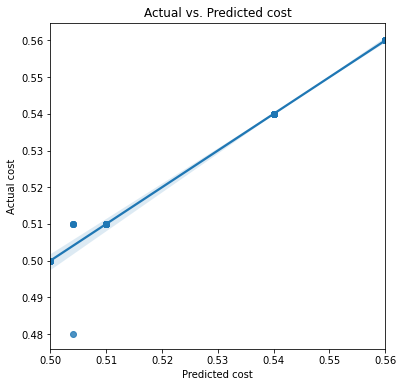

In [10]:
y = df_cost['cost']
X = df_cost[Factors + InteractionTerms]

## An intercept is not added by default, so we need to add that here
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

print(results.summary())

plt.figure(figsize=(PlotWidth, PlotWidth))
sns.regplot(x=results.predict(X), y=y)
plt.xlabel('Predicted cost')
plt.ylabel('Actual cost')
plt.title('Actual vs. Predicted cost')
plt.show()

In [11]:
with localconverter(ro.default_converter + pandas2ri.converter):
    cost_rsm = rsm.rsm("cost ~ SO(alh, aps, aid, awt, arw)", data = df_cost)
base.summary(cost_rsm)

<rpy2.robjects.vectors.ListVector object at 0x7fd7f819fa00> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( rsm(formula = cost ~ SO(alh, aps, aid, awt, arw), data = structure(list( )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7fd7f8173300> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x7fd7f8173200> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.000000, 0.006000, 0.000000, -0.000000, ..., -0.000000, -0.000000, 0.000000, 0.000000]
  coefficients: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x7fd7f8173800> [RTYPES.REALSXP]
R classes: ('matrix',)
[0.374833, 0.004167, -0.002983, 0.090000, ..., 0.000000, 0.000000, 0.000000, 0.000000]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x7fd7f8ed0840> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.976331]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x7fd7f85d6580> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.970784]
  r.squared: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x7fd7f85d6400> [RTYPES.REALSXP]
R classes: ('numeric',)
[176.000000, 15.000000, 64.000000]
  adj.r.squared: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x7fd7f8161240> [RTYPES.REALSXP]
R classes: ('matrix',)
[116.293056, -131.388889, -1.772222, -169.444444, ..., -0.000000, -0.000000, -0.000000, 7.812500]